<a href="https://colab.research.google.com/github/ShrivatsaGuru/productivity/blob/main/Tomato_Disease_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
import os

drive.mount('/content/drive')

# Step 2: Define the path to your dataset in Google Drive
dataset_path = '/content/drive/My Drive/Project/tomato/'  # Adjust this path to the location of your dataset

# Step 3: Change the working directory to the dataset directory
os.chdir(dataset_path)

# Step 4: List the files in the directory to confirm
print(os.listdir())


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
['cnn_train.py', 'val', 'train']


In [ ]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from PIL import Image

from tensorflow import keras
from tensorflow.keras.applications import ResNet152V2
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras.models import Model






In [ ]:
datagen= keras.preprocessing.image.ImageDataGenerator(rescale= 1/255, validation_split=0.3)
datagen2 =keras.preprocessing.image.ImageDataGenerator(rescale=1/255)

In [ ]:
train=datagen.flow_from_directory('./train', seed=123, subset='training')
val=datagen.flow_from_directory('./train', seed=123, subset='validation')
test=datagen2.flow_from_directory('./val')

Found 7000 images belonging to 10 classes.
Found 3000 images belonging to 10 classes.
Found 1000 images belonging to 10 classes.


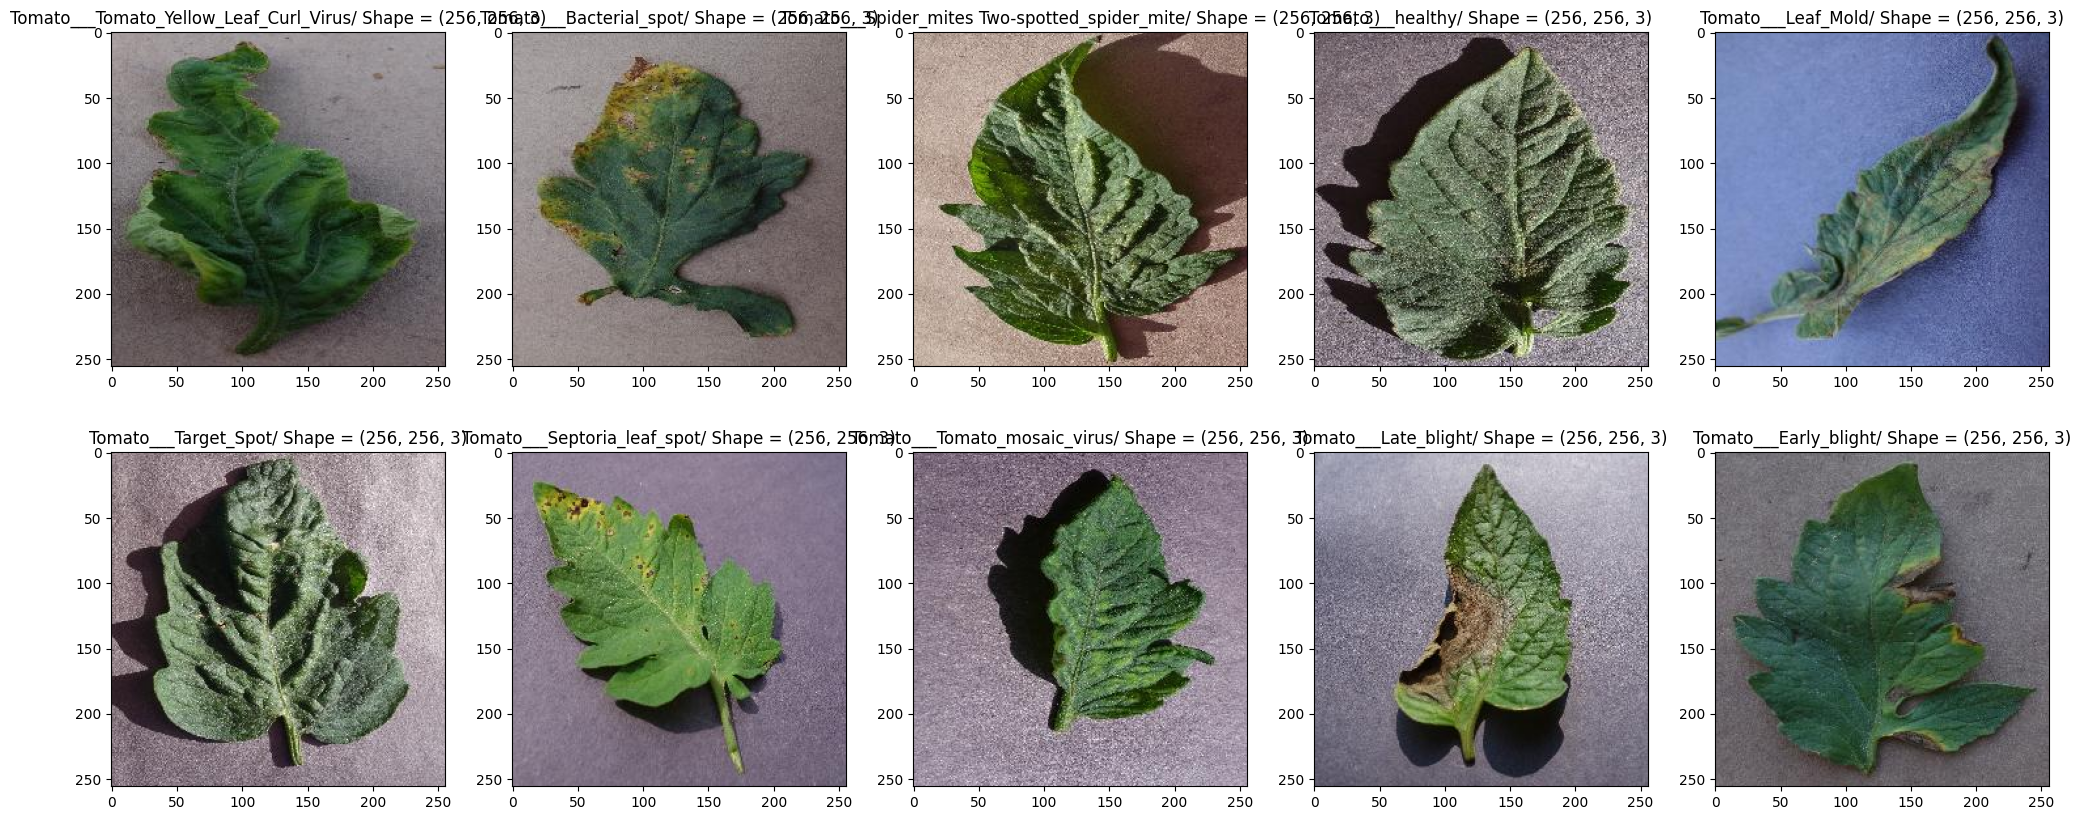

In [ ]:
classes = os.listdir('./train')
plt.figure(figsize=(25,10))


for i in enumerate(classes) :
  pic = os.listdir('./train/'+i[1])[0]
  image= Image.open('./train/'+i[1]+'/'+pic)
  image= np.asarray(image)
  plt.subplot(2,5, i[0]+1)
  plt.title('{0}/ Shape = {1}'.format(i[1], image. shape))
  plt.imshow(image)
plt . show()

In [ ]:
base_model = ResNet152V2(input_shape=(256,256,3), include_top=False)

# Freeze the first 140 layers
for layers in base_model.layers[:140]:
    layers.trainable = False

# Unfreeze the remaining layers
for layers in base_model.layers[140:]:
    layers.trainable = True

234545216/234545216 [==============================] - 3s 0us/step


In [ ]:
x = base_model.output
x= GlobalAveragePooling2D()(x)
x = Dense(1000, activation='relu')(x)
pred =Dense(10, activation='softmax')(x)
model = Model(inputs=base_model.input, outputs=pred)

In [ ]:
model.compile(loss='categorical_crossentropy',optimizer='sgd' ,metrics='accuracy' )

In [ ]:
model.fit(train, batch_size=80, epochs=15, validation_data=val)

Epoch 1/15
219/219 [==============================] - 2155s 10s/step - loss: 0.6314 - accuracy: 0.8113 - val_loss: 0.1756 - val_accuracy: 0.9447
Epoch 2/15
219/219 [==============================] - 187s 853ms/step - loss: 0.0792 - accuracy: 0.9771 - val_loss: 0.1124 - val_accuracy: 0.9627
Epoch 3/15
219/219 [==============================] - 187s 852ms/step - loss: 0.0265 - accuracy: 0.9944 - val_loss: 0.0965 - val_accuracy: 0.9637
Epoch 4/15
219/219 [==============================] - 187s 851ms/step - loss: 0.0137 - accuracy: 0.9973 - val_loss: 0.1133 - val_accuracy: 0.9630
Epoch 5/15
219/219 [==============================] - 187s 852ms/step - loss: 0.0114 - accuracy: 0.9983 - val_loss: 0.0754 - val_accuracy: 0.9740
Epoch 6/15
219/219 [==============================] - 186s 848ms/step - loss: 0.0066 - accuracy: 0.9990 - val_loss: 0.0838 - val_accuracy: 0.9717
Epoch 7/15
219/219 [==============================] - 201s 919ms/step - loss: 0.0055 - accuracy: 0.9987 - val_loss: 0.0832 - 

1/1 [==============================] - 0s 33ms/step


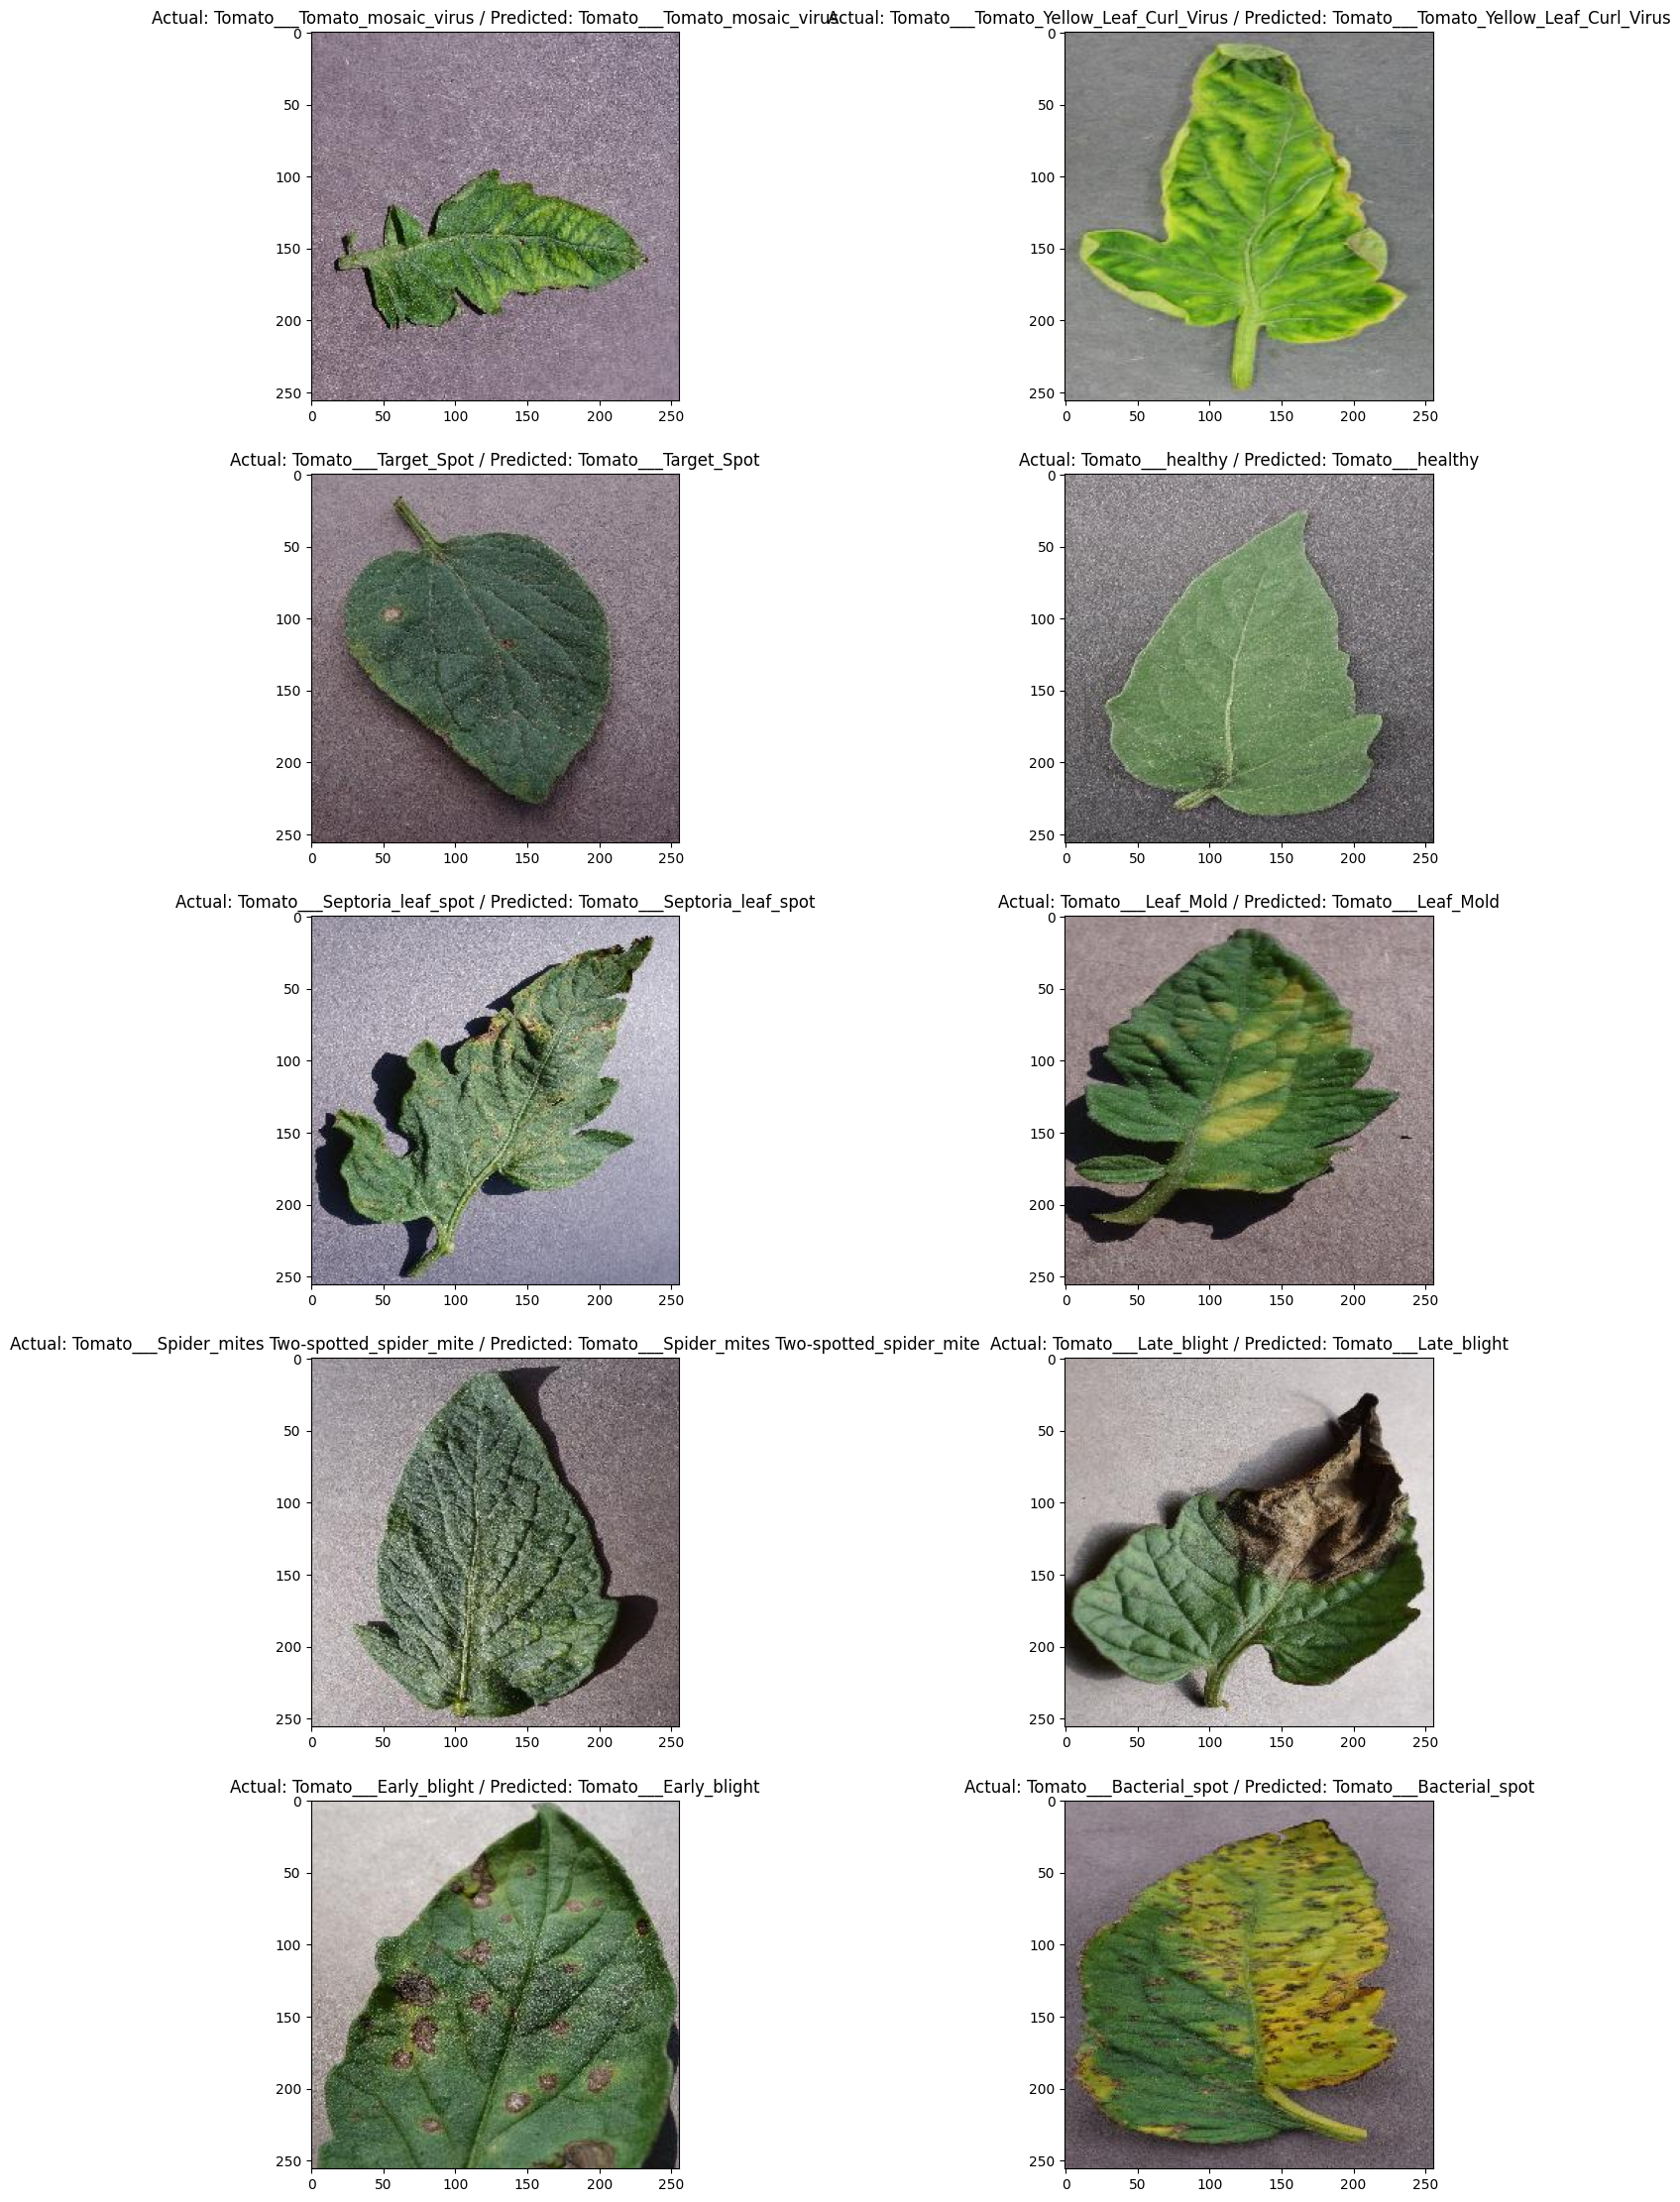

In [ ]:
classes =os.listdir('./val')
plt.figure(figsize=(18 ,28))

for i in enumerate(classes) :
  pic = os.listdir('./val/'+i[1])
  pic = pic[np.random.randint(len(pic)-1)]
  image = Image.open('./val/'+i[1]+'/'+pic)
  image = np.asarray(image)
  pred =  np.argmax (model.predict(image.reshape( -1 , 256 , 256, 3) /255) )
  for j in list (enumerate(list(test.class_indices.keys()))):
    if pred ==j[0]:
      prediction = j[1]
  plt.subplot(5,2,i[0]+1)
  plt.title( 'Actual: {0} / Predicted: {1}'.format(i[1],prediction))
  plt.imshow( image)
plt . show()


In [ ]:
save_path = '/content/drive/My Drive/Projects'  # Adjust this path to your preferred save location

# Step 3: Save the model to the specified path
model.save(save_path)